# Computational Social Science Project 3

##### **Group 1:**
+ Yael Nidam
+ Kelly Quinn
+ Monica De La Cruz

##### **Purpose of report**
1. Develop machine learning models to predict whether a business passes or fails a food inspection in Chicago, taking into consideration business information, previous inspection results, and neighborhood information.
2. Analyze the data to help city officials prioritize locations for food inspection audits.

##### **Data Sources**  
The City of Chicago's Open Data Portal food inspection data for 2011-2014.

##### **Overview**
1. Data cleaning and exploratory data analysis.
2. Data Pre-Processing and Cleaning.
3. Fit models.
4. Policy simulation.
5. Discussion.

## 1.Data cleaning and exploratory data analysis
This section was written by Aniket Kesari. It loads the libraries and the data, cleans the data, and conducts exploratory data analysis.

### 1.1 Load libraries and data

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

#Added libraries
from sklearn import preprocessing #Adding package to help us normalize the data
from sklearn import feature_selection, tree
from sklearn.ensemble import RandomForestClassifier # add RF classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [2]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("Chicago Inspections 2011-2013.csv")

# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("Chicago Inspections 2014.csv")

In [3]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head(3)

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.90,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.55,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.55,12.611239,8.004220,8.320330,0


In [4]:
# List column names
#chicago_inspections_2011_to_2013.columns

In [5]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)  

## Visualization

**What do inspections look like over time?**  
Inspection vary between days, weeks, and month. Overall there were more inspections in 2013 than in 2012, and on July of both years there were the smallest amount of inspections.

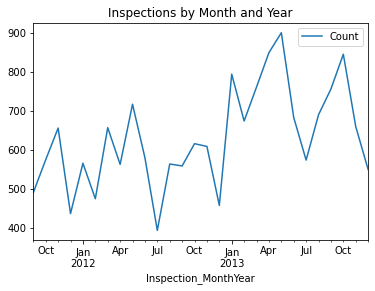

In [7]:
# Visualize Inspections Over Time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year")

**What do the results look like?**   
There is an imbalance between the classes of the results, with most inspections falling into the 'pass' class.

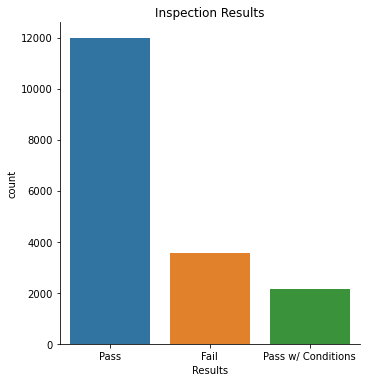

In [8]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

**What if we separate by facility type?**  
Overall, resturants seem to be more represented in all result categories.

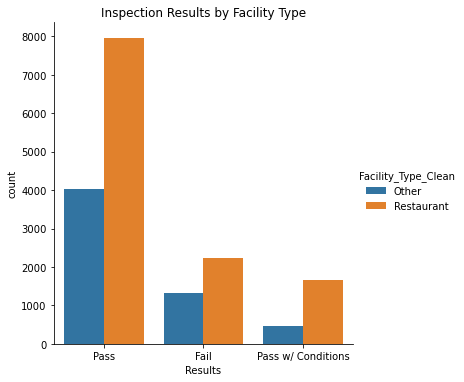

In [9]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

**Are there features that predict the outcome too well?**  
We examine four features that have the potential to predict the outcomes too well and we suspect might lead to overfitting. We show the graphs below for the studied features, and we present the results as a binary outcome, collapsing pass and pass with conditions into one variable. Out of the four features examined, we identify serious count as having the potential to provide too acurate predictions, but since this variable is measured similarly in the test data set, we decide to keep this variable and all others in our preduction data set.

In [10]:
# This chunk creates a copy of our dataset with a binary variable for results
viz_dat = chicago_inspections_2011_to_2013
viz_dat['Results_binary'] = viz_dat['Results']
viz_dat['Results_binary']  = viz_dat['Results_binary'] .replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
viz_dat['Results_binary']  = lb_style.fit_transform(viz_dat['Results_binary'] )
viz_dat['Results_binary']  = np.where(viz_dat['Results_binary']  == 1, 0 ,1)

*a) seriousCount:*

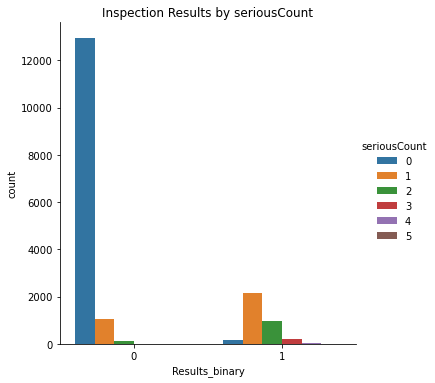

In [11]:
# Inspection Results by serious count
sns.catplot(data = viz_dat,
           x = "Results_binary",
           kind = "count",
           hue = 'seriousCount')

plt.title("Inspection Results by seriousCount")
plt.show()

   *b) criticalFound:*

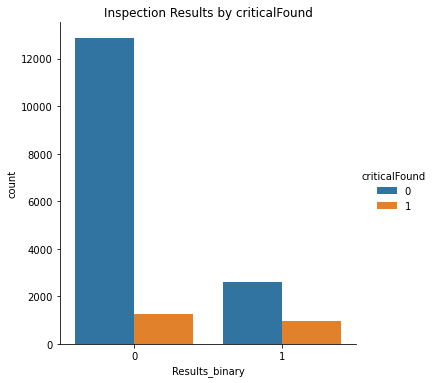

In [12]:
# Inspection Results by critical Found
sns.catplot(data = viz_dat,
           x = "Results_binary",
           kind = "count",
           hue = 'criticalFound')

plt.title("Inspection Results by criticalFound")
plt.show()

   *c) criticalCount:*

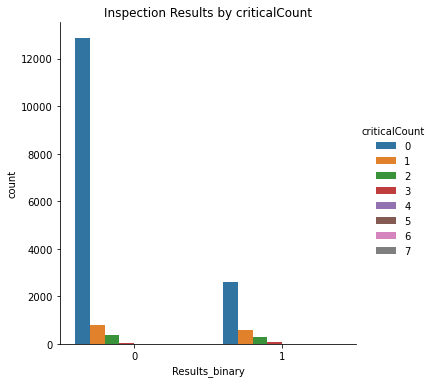

In [13]:
# Inspection Results by critical Count
sns.catplot(data = viz_dat,
           x = "Results_binary",
           kind = "count",
           hue = 'criticalCount')

plt.title("Inspection Results by criticalCount")
plt.show()

   *d) minorCount:*

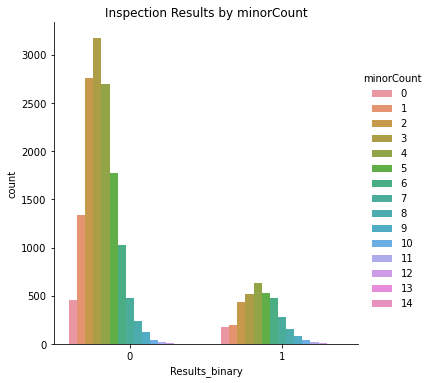

In [14]:
# Inspection Results by minor Count 
sns.catplot(data = viz_dat,
           x = "Results_binary",
           kind = "count",
           hue = 'minorCount')

plt.title("Inspection Results by minorCount")
plt.show()

## 2. Preprocess Data

Having done some initial EDA, we now drop date variables and investigate whether 

In [15]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

#Check that numeric values are not accidentaly recorded as objects.
#chicago_inspections_2011_to_2013.loc[:, chicago_inspections_2011_to_2013.dtypes == np.object].head(3)

#Check that there are no rows with null values
#print(chicago_inspections_2011_to_2013.isnull().sum().sum())

#correct datatype
chicago_inspections_2011_to_2013['POLICE_DISTRICT'] = chicago_inspections_2011_to_2013['POLICE_DISTRICT'].astype(object)

We use the describe function to see if we have categorial variables with too many unique values. We are interested in recoding these variables so that when we proceed to dumifying the data we wouldn't create too many new variables that capture very little information about our data set. We discover that there are four features with a large amount of unique values:

In [16]:
dat_describe = np.transpose(chicago_inspections_2011_to_2013.describe(include='all'))
dat_describe[dat_describe.unique>5]

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Facility_Type,15311,168,Restaurant,11412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WARD_PRECINCT,15311,1792,42-9,682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POLICE_DISTRICT,15311,23,1,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LICENSE_DESCRIPTION,15311,41,Retail Food Establishment,14307,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We decide to drop facility type and ward precinct because the information they contain is too granular. We keep police district as a proxy for ward precinct and liscence description as a proxy for facility type.

In [17]:
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop([
                                    'Facility_Type_Clean', 'Results_binary'
                                    ,'Facility_Type','WARD_PRECINCT','Inspection_Type'
                                     ],
                                      axis = 1)
chicago_inspections_2011_to_2013.shape

(15311, 35)

**Multicolliniarity**

Now that we've dropped unnecessary variables, we run a correlation matrix for the variables in the final data frame to ensure there is no collinearity. 

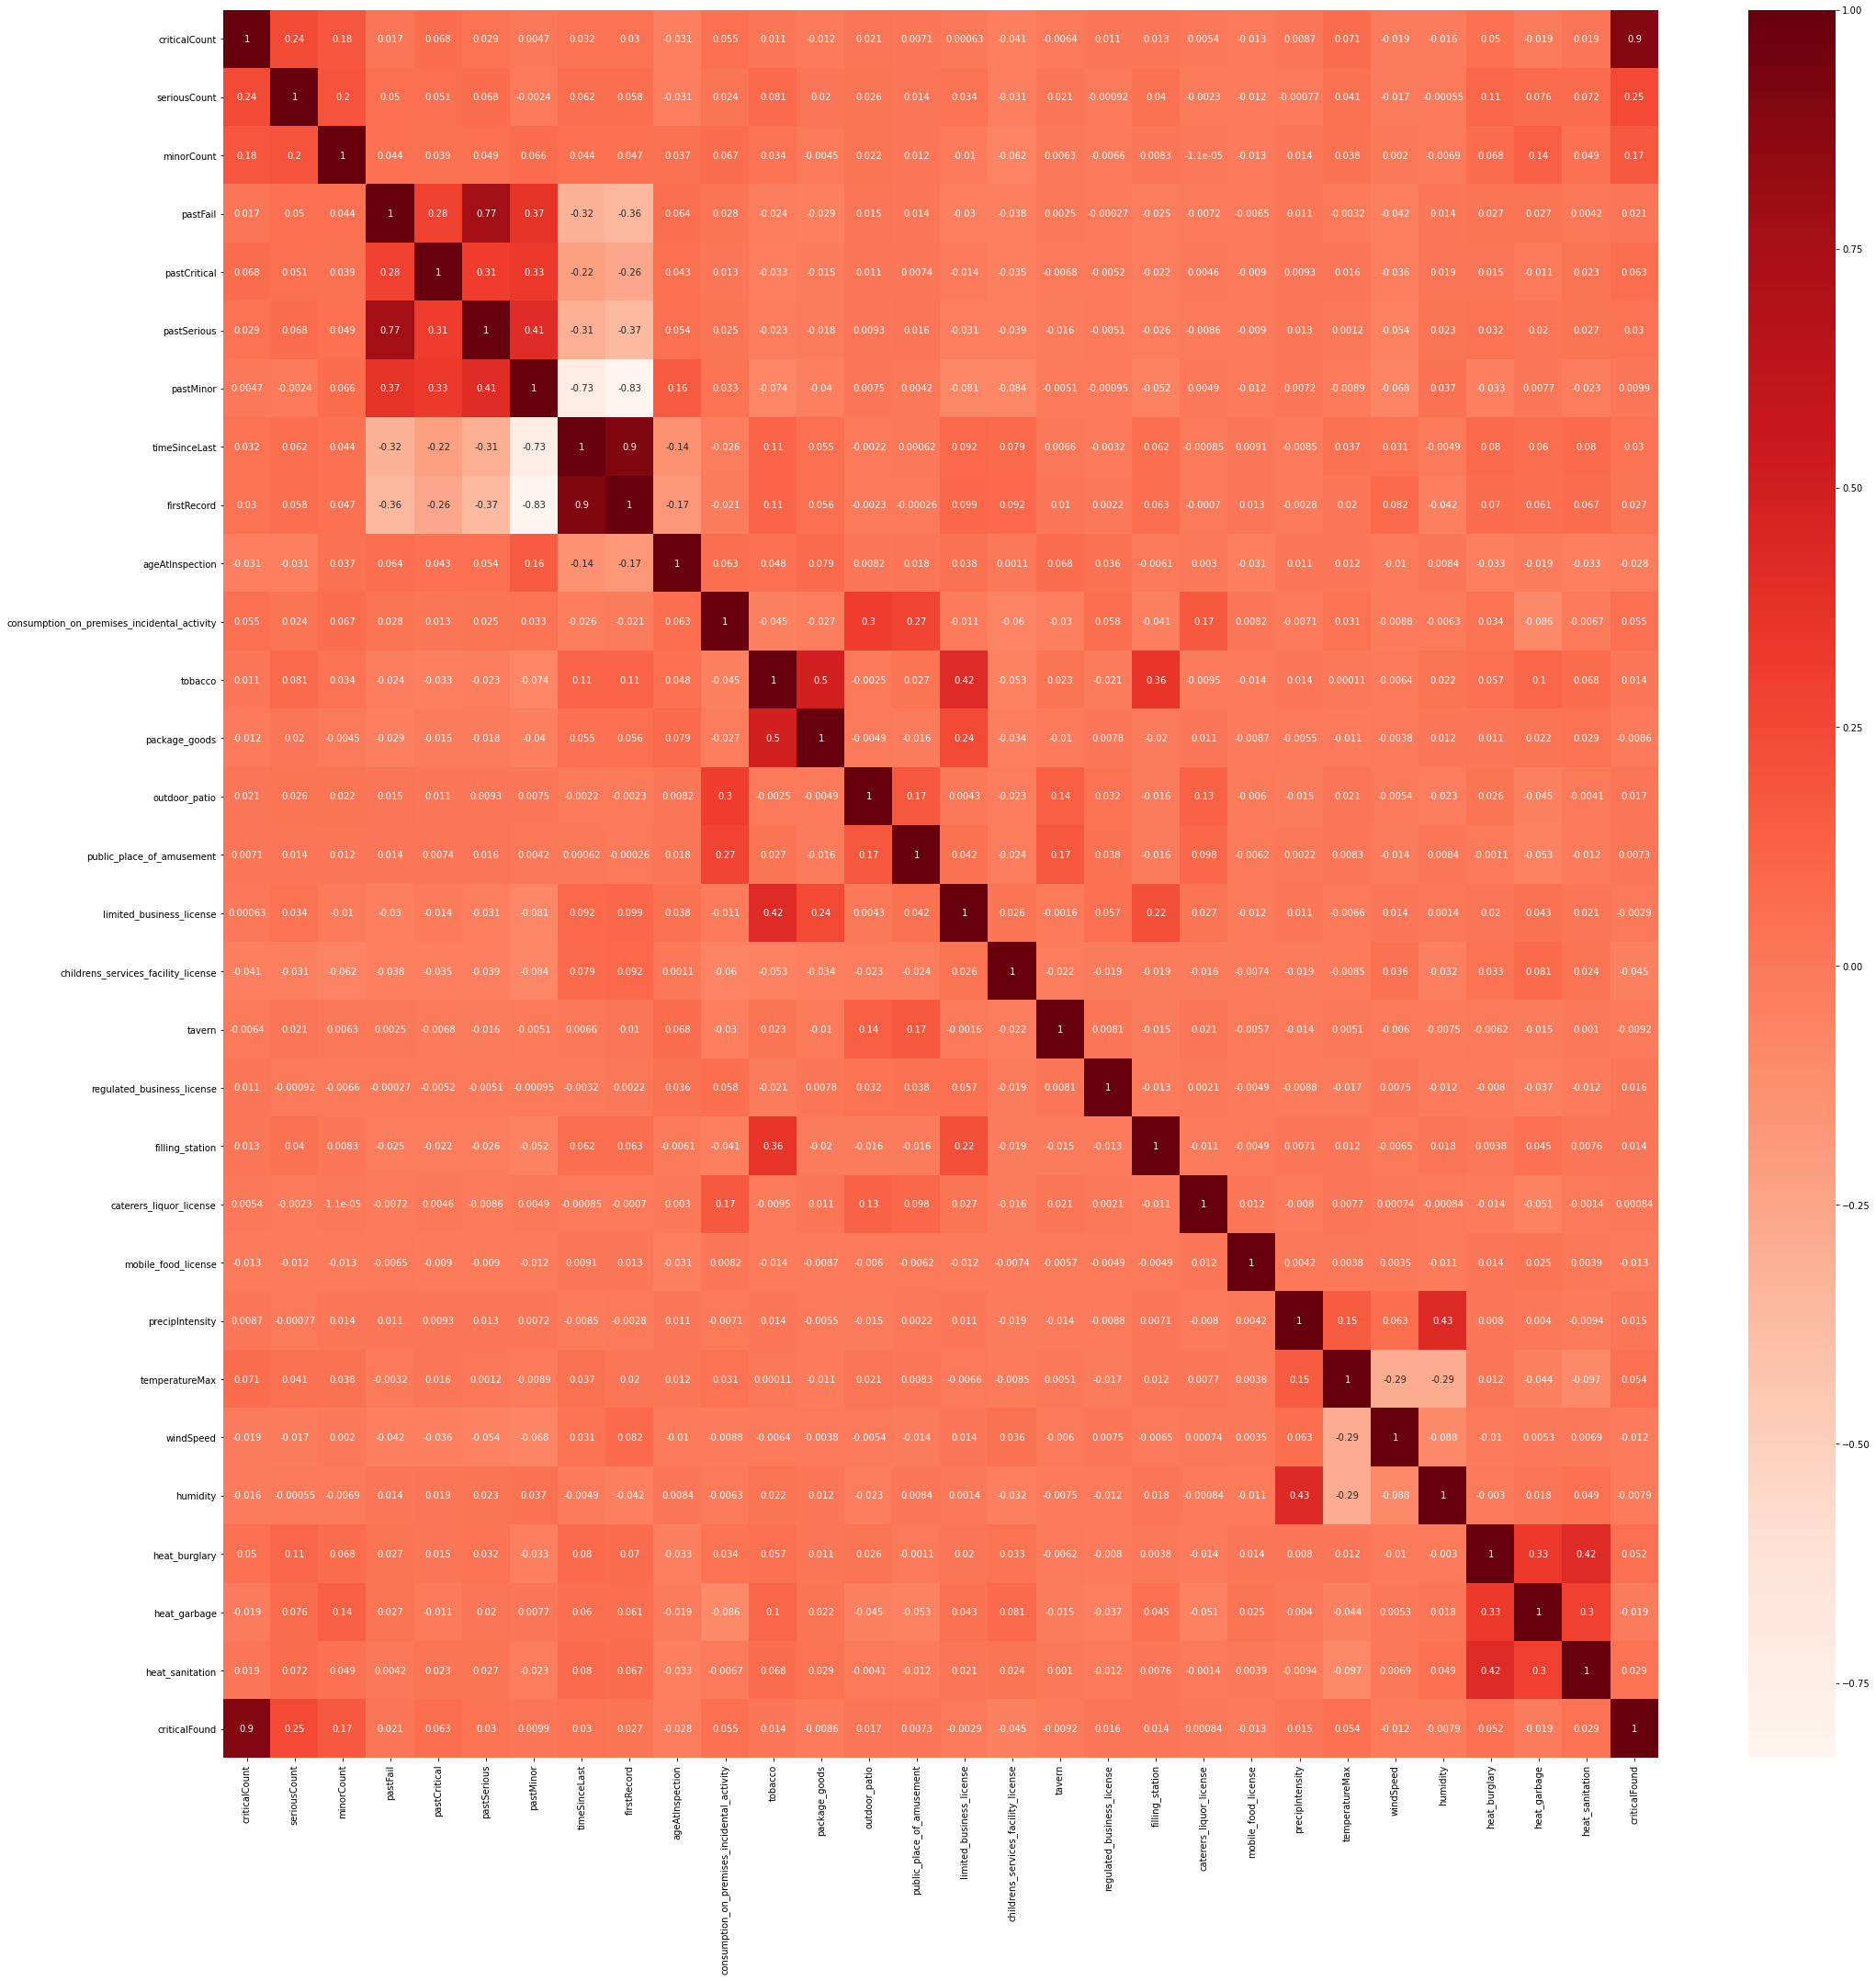

In [18]:
plt.figure(figsize=(35,35))
cor = chicago_inspections_2011_to_2013.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

We discover the following colliniarities:
* critical found and critical count(cor=0.9).
* first record and timesincelast (cor=0.9).
* first record and pastminor (cor=-0.83)
* timesincelast and past minor (-0.73)
* pastserious and pastfail (0.77)

In light of this, we drop criticalFound and firstRecord below.

In [19]:
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop([
                                    'criticalFound'
                                    ,'firstRecord'
                                     ],
                                      axis = 1)
chicago_inspections_2011_to_2013.shape

(15311, 33)

In [20]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']
## Comment out the following code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)
# Recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])
X = pd.get_dummies(X)

In [21]:
#Scale data
X = pd.DataFrame(preprocessing.scale(X), columns = X.columns)

# Use a variance threshold of .8 to remove columns with no variance
selector = feature_selection.VarianceThreshold(0)
X = pd.DataFrame(selector.fit_transform(X), columns = X.columns)

X.head(3)

,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),POLICE_DISTRICT_1.0,POLICE_DISTRICT_2.0,POLICE_DISTRICT_3.0,POLICE_DISTRICT_4.0,POLICE_DISTRICT_5.0,POLICE_DISTRICT_6.0,POLICE_DISTRICT_7.0,POLICE_DISTRICT_8.0,POLICE_DISTRICT_9.0,POLICE_DISTRICT_10.0,POLICE_DISTRICT_11.0,POLICE_DISTRICT_12.0,POLICE_DISTRICT_14.0,POLICE_DISTRICT_15.0,POLICE_DISTRICT_16.0,POLICE_DISTRICT_17.0,POLICE_DISTRICT_18.0,POLICE_DISTRICT_19.0,POLICE_DISTRICT_20.0,POLICE_DISTRICT_22.0,POLICE_DISTRICT_24.0,POLICE_DISTRICT_25.0,POLICE_DISTRICT_81.0,LICENSE_DESCRIPTION_Assisted Living/Shared Housing Establishment,LICENSE_DESCRIPTION_Children's Services Facility License,LICENSE_DESCRIPTION_Consumption on Premises - Incidental Activity,LICENSE_DESCRIPTION_Day Care Center 2 - 6 Years,LICENSE_DESCRIPTION_Day Care Center Under 2 Years,LICENSE_DESCRIPTION_Day Care Center Under 2 and 2 - 6 Years,LICENSE_DESCRIPTION_Food - Shared Kitchen,LICENSE_DESCRIPTION_Food - Shared Kitchen - Supplemental,LICENSE_DESCRIPTION_Hazardous Materials,LICENSE_DESCRIPTION_Home Occupation,LICENSE_DESCRIPTION_Home Repair,LICENSE_DESCRIPTION_Hospital,LICENSE_DESCRIPTION_Hotel,LICENSE_DESCRIPTION_Late Hour,LICENSE_DESCRIPTION_Limited Business License,LICENSE_DESCRIPTION_Long-Term Care Facility,LICENSE_DESCRIPTION_Manufacturing Establishments,LICENSE_DESCRIPTION_Mobile Food License,LICENSE_DESCRIPTION_Motor Vehicle Repair : Engine Only (Class II),LICENSE_DESCRIPTION_Motor Vehicle Repair: Engine/Body(Class III),LICENSE_DESCRIPTION_Music and Dance,LICENSE_DESCRIPTION_Navy Pier Kiosk License,LICENSE_DESCRIPTION_Navy Pier Vendor (Food),LICENSE_DESCRIPTION_Not-For-Profit Club,LICENSE_DESCRIPTION_Outdoor Patio,LICENSE_DESCRIPTION_Package Goods,LICENSE_DESCRIPTION_Public Garage,LICENSE_DESCRIPTION_Public Place of Amusement,LICENSE_DESCRIPTION_Regulated Business License,LICENSE_DESCRIPTION_Residential Real Estate Developer,LICENSE_DESCRIPTION_Retail Food - Seasonal Lakefront Food Establishment,LICENSE_DESCRIPTION_Retail Food Est.-Supplemental License for Dog-Friendly Areas,LICENSE_DESCRIPTION_Retail Food Establishment,"LICENSE_DESCRIPTION_Scavenger, Private",LICENSE_DESCRIPTION_Shared Kitchen User,LICENSE_DESCRIPTION_Special Event Food,LICENSE_DESCRIPTION_Tavern,"LICENSE_DESCRIPTION_Tire Facilty Class I (100 - 1,000 Tires)",LICENSE_DESCRIPTION_Tobacco,LICENSE_DESCRIPTION_Wholesale Food Establishment,LICENSE_DESCRIPTION_Wrigley Field,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
0,-0.351081,-0.526077,-0.861411,-0.280933,-0.205945,-0.287986,-0.652463,0.712016,1.156423,-0.356676,3.186141,-0.200197,-0.137475,-0.142566,3.659240,-0.168764,-0.130401,-0.112988,-0.113579,-0.093254,-0.043562,2.809639,-0.330793,0.914236,2.586097,0.369503,-0.150014,0.819983,-1.676768,-0.512807,4.179622,-0.359578,-0.167326,-0.106276,-0.143517,-0.119059,-0.1224,-0.111496,-0.279849,-0.234799,-0.173015,-0.113284,-0.276442,-0.221165,-0.103088,-0.295292,-0.234179,-0.350246,2.991432,-0.195383,-0.172413,-0.203874,-0.213252,-0.01143,-0.008082,-0.013999,-0.032343,-0.133981,-0.074273,-0.099132,-0.016165,-0.013999,-0.0198,-0.016165,-0.0198,-0.044308,-0.008082,-0.016165,-0.091818,-0.084676,-0.028007,-0.008082,-0.013999,-0.013999,-0.01143,-0.01143,-0.008082,-0.016165,-0.01143,-0.03706,-0.016165,-0.013999,-0.032343,-0.016165,-0.01143,-0.008082,0.264906,-0.01143,-0.008082,-0.008082,-0.041243,-0.008082,-0.043562,-0.036166,-0.040441,-0.036166,-0.048547,-0.381581,0.387846
1,-0.351081,-0.526077,-0.364947,-0.280933,-0.205945,-0.287986,

Lastly, we create the training and validation data sets. 

In [22]:
# Set seed
np.random.seed(10)

X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size = .6, test_size=0.4,
                                                    random_state=13,stratify=y)


# Since our results are imbalanced, we use over and under sampling to avoid misleading results:
random_over_sampler = RandomOverSampler(sampling_strategy=0.5)
random_under_sampler = RandomUnderSampler(sampling_strategy=0.5)

X_train_over, y_train_over = random_over_sampler.fit_resample(X_train, y_train)
X_train_under, y_train_under = random_under_sampler.fit_resample(X_train, y_train)

## 3. Fit Models

We fit 3 different classification models:
1. Logistic Regression.
2. Support Vector Machine.
3. Decision Tree informed by Random forest feature selection.

In [23]:
# We define a function to estimate the Root-Mean-Square-Deviation for all models.
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

### Model 1: Logistic Regression

We're interested in using logistic regression in our analysis because of its widespread use in social science analysis and we're interested in its application in the ML context and how it compares with other more 'data science' methods.

The logistic regression model predicts the probability of a label to fall within one bianry outcome or another, and generates a prediction based on the probability estimate. The contribution of each feature into the prediction is assessed using weights (coefficiencts) that are optimized by the maximum likelihood function.

The logistic regression model is usefull because it is very easy to interpret and works well on linear datasets. At the same time it is not well suited to problems with a lot of features (risk of overfitting) or with datasets that have a lot of coliniarity. We try to adjust for these shortcomings by drop features that are highly co-related and by re-running the model on selected features.

In [24]:
logit_model = LogisticRegression(max_iter=10000)

#Define how to tune Hyperparameters
logit_param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
              'C': np.arange(.01, 0.1, .05),
              'fit_intercept': ['True', 'False'],
              'solver': ['liblinear', 'saga']}
logit_grid = GridSearchCV(logit_model, logit_param_grid, cv=3)

In [25]:
def logit_tune (X_train,y_train,X_validate,y_validate):
    
    # Train tuned model on training set
    logit = logit_grid.fit(X_train, y_train.ravel())
    best_index = np.argmax(logit.cv_results_["mean_test_score"])

    # Use best model to predict on training and validation sets
    logit_pred_training = logit.best_estimator_.predict(X_train)
    logit_pred_validation = logit.best_estimator_.predict(X_validate)
    logit_coef_validation = logit.best_estimator_.coef_[0]
    results=[logit_pred_validation,logit_coef_validation,logit.best_estimator_]
    
    #Print model parameters
    print(logit.cv_results_["params"][best_index])

    # compare RMSE
    print("Logistic Regression RMSE Training: ",rmse(logit_pred_training, y_train))
    print("Logistic Regression RMSE Validation: ",rmse(logit_pred_validation, y_validate))
    print('Training R^2:', logit.best_estimator_.score(X_train, y_train))
    print('Validation R^2:', logit.best_estimator_.score(X_validate, y_validate))
    
    #compare confusion matrix
    cf_matrix = confusion_matrix(y_validate, logit_pred_validation, normalize = "true")
    df_cm = pd.DataFrame(cf_matrix, range(2),range(2))
    print("confusion Matrix:", df_cm)
    
    return (results)

We use oversampling of minority class and underesampling of majority class to assess which model performs best for our imbalanced data. We discover that despite having the highest RMSE, oversampling of the minority class performs best in predicting the minority class and worse in predicting the majoity class. We decide to keep this model because we're interested in predicting the minority class.

In [26]:
print("All data:")
logit_best_pred_alldata = logit_tune(X_train,y_train,X_validate,y_validate)
print("Oversampling:")
logit_best_pred_over = logit_tune(X_train_over, y_train_over,X_validate,y_validate)
print("Undersampling:")
logit_best_pred_under = logit_tune(X_train_under, y_train_under,X_validate,y_validate)

All data:
{'C': 0.01, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression RMSE Training:  0.57776895370707
Logistic Regression RMSE Validation:  0.5773670436043261
Training R^2: 0.9282603962551709
Validation R^2: 0.9204897959183673
confusion Matrix:           0         1
0  0.938241  0.061759
1  0.149798  0.850202
Oversampling:
{'C': 0.01, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression RMSE Training:  0.26542068698216387
Logistic Regression RMSE Validation:  0.5972729362972617
Training R^2: 0.9295518589219162
Validation R^2: 0.9204897959183673
confusion Matrix:           0         1
0  0.913701  0.086299
1  0.052632  0.947368
Undersampling:
{'C': 0.01, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression RMSE Training:  0.2662974405694724
Logistic Regression RMSE Validation:  0.5970282088944738
Training R^2: 0.9290856731461483
Validation R^2: 0.9206530612244898
confusion Matrix:           0         

**Logistic regression feature selection**  

In [110]:
#We identify the top features
log_reg_data = pd.DataFrame([logit_best_pred_over[1], X.columns]).T
log_reg_data.columns= ['Coefficient', 'Feature']
log_reg_data['AbsCoef'] = pd.to_numeric(log_reg_data['Coefficient'].abs())

top = log_reg_data.nlargest(15,['AbsCoef'])

In [111]:
#We subset features to our top performing features list and re-fit the model
X_train_over_SF = X_train_over[top['Feature']]
X_validate_SF = X_validate[top['Feature']]

In [112]:
print("Oversampling:")
logit_best_pred_over_SF = logit_tune(X_train_over_SF, y_train_over,X_validate_SF,y_validate)

Oversampling:
{'C': 0.01, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression RMSE Training:  0.26542068698216387
Logistic Regression RMSE Validation:  0.5972729362972617
Training R^2: 0.9295518589219162
Validation R^2: 0.9204897959183673
confusion Matrix:           0         1
0  0.913701  0.086299
1  0.052632  0.947368


Since we discover that one feature (serious count) is responsible for the majority of predictive power and reducing the number of features to the top 12 provides the same prediction as including all features, we explore what happens we we remove seriouscount from our dataset. The results below show that without this variable our predictions of the minority class are very bad. We decide to keep this variable since it appears in the test dataset, but now we have developed some suspision about its relationship with the results.

In [113]:
# Adjusting resampling
random_over_sampler = RandomOverSampler(sampling_strategy=0.8)
X_train_over_RE, y_train_over_RE = random_over_sampler.fit_resample(X_train, y_train)

X_train_over_RE_SR = X_train_over_RE.drop(['seriousCount'], axis = 1)
X_validate_SR = X_validate.drop(['seriousCount'], axis = 1)

X_validate_SF_SR = X_validate_SF.drop(['seriousCount'], axis = 1)
X_train_over_RE_SF = X_train_over_RE[top['Feature']]
X_train_over_SF_RE_SR = X_train_over_RE_SF.drop(['seriousCount'], axis = 1)

print("Oversampling + All features:")
logit_best_pred_over_SF_SR = logit_tune(X_train_over_RE_SR, y_train_over_RE,X_validate_SR,y_validate)

print("Oversampling + Feature selection:")
logit_best_pred_over_SF_SR_RE = logit_tune(X_train_over_SF_RE_SR, y_train_over_RE,X_validate_SF_SR,y_validate)

Oversampling + All features:
{'C': 0.01, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression RMSE Training:  0.5825531990123904
Logistic Regression RMSE Validation:  0.5962117253887628
Training R^2: 0.6606317703204303
Validation R^2: 0.7364897959183674
confusion Matrix:           0         1
0  0.799796  0.200204
1  0.514170  0.485830
Oversampling + Feature selection:
{'C': 0.01, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression RMSE Training:  0.590239526192912
Logistic Regression RMSE Validation:  0.5883158322992372
Training R^2: 0.6516173017195667
Validation R^2: 0.7391020408163266
confusion Matrix:           0         1
0  0.811247  0.188753
1  0.546559  0.453441


### Model 2: Support Vector Machine

Support Vector Machine (SVM) is a type of classification algorithm that identifies a hyperplane in multidimensional space that separates each class of data points based on features. The best hyperplane is one that maximizes the margin distance between the plane itself and the classes of data points. 

In [31]:
# create a model (is more specifically C-support vector classification)
svm = SVC()

# tune the hyperparameters (totally unsure about which hyperparameters to choose, when adding beyond 'C' my computer stalled lol)
svm_param_grid = {'C': np.arange (1,10,1),
                 'kernel': ['rbf']}

svm_grid = GridSearchCV(svm, svm_param_grid, cv=3, iid=False)

In [32]:
def svm_tune (X_train,y_train,X_validate,y_validate):
    
    # Train tuned model on training set
    svm_model = svm_grid.fit(X_train, y_train.ravel())
    best_index = np.argmax(svm_model.cv_results_["mean_test_score"])

    # Use best model to predict on training and validation sets
    svm_pred_training = svm_model.best_estimator_.predict(X_train)
    svm_pred_validation = svm_model.best_estimator_.predict(X_validate)
    results=[svm_pred_validation]
    
    #Print model parameters
    print(svm_model.cv_results_["params"][best_index])

    # compare RMSE
    print("SVM RMSE Training: ",rmse(svm_pred_training, y_train))
    print("SVM RMSE Validation: ",rmse(svm_pred_validation, y_validate))
    print('Training R^2:', svm_model.best_estimator_.score(X_train, y_train))
    print('Validation R^2:', svm_model.best_estimator_.score(X_validate, y_validate))
    
    #compare confusion matrix
    cf_matrix = confusion_matrix(y_validate, svm_pred_validation, normalize = "true")
    df_cm = pd.DataFrame(cf_matrix, range(2),range(2))
    print("confusion Matrix:", df_cm)
    
    return (results)

In [33]:
#Note, this code takes about 4-5 mins to run

print("All data:")
svm_best_pred_alldata = svm_tune(X_train,y_train,X_validate,y_validate)

print("Oversampling:")
svm_best_pred_over = svm_tune(X_train_over, y_train_over,X_validate,y_validate)

print("Undersampling:")
svm_best_pred_under = svm_tune(X_train_under, y_train_under,X_validate,y_validate)

All data:
{'C': 2, 'kernel': 'rbf'}
SVM RMSE Training:  0.5802934033838605
SVM RMSE Validation:  0.5783786094852035
Training R^2: 0.9436098410624864
Validation R^2: 0.9142857142857143
confusion Matrix:           0         1
0  0.933129  0.066871
1  0.160324  0.839676
Oversampling:
{'C': 9, 'kernel': 'rbf'}
SVM RMSE Training:  0.2022507657312757
SVM RMSE Validation:  0.58357710065009
Training R^2: 0.9590946277611127
Validation R^2: 0.9126530612244897
confusion Matrix:           0         1
0  0.925767  0.074233
1  0.139271  0.860729
Undersampling:
{'C': 3, 'kernel': 'rbf'}
SVM RMSE Training:  0.24518399373682045
SVM RMSE Validation:  0.5940016140839692
Training R^2: 0.9398848092152627
Validation R^2: 0.912
confusion Matrix:           0         1
0  0.912474  0.087526
1  0.089879  0.910121


We identify the model that undersamples the majority class as the best pridictor of the minority class. Since we have developed a curiousity to the impact of the seriouscount variable on the accuracy of the prediction, we examine what happens to our prediction when we train a model without this feature. Results below show the such a model would be a bad predictor of the minority class.

In [34]:
print("Undersampling:")
svm_best_pred_over = svm_tune(X_train_under.drop(['seriousCount'], axis = 1,inplace=False), y_train_under
                              ,X_validate.drop(['seriousCount'], axis = 1,inplace=False),y_validate)

Undersampling:
{'C': 2, 'kernel': 'rbf'}
SVM RMSE Training:  0.4870534080757618
SVM RMSE Validation:  0.5136053809073261
Training R^2: 0.7627789776817855
Validation R^2: 0.7892244897959184
confusion Matrix:           0         1
0  0.929039  0.070961
1  0.764372  0.235628


#### Best SVM hyperparameters
'C' : 3, 'kernel': rbf, 
using undersampling because we are interested in predicting the minority class even though this model has a slightly higher RMSE than oversampling


In [35]:
# create a revised svm model with best hyperparameters
svm2 = SVC(C=3, kernel='rbf')

# fit the model
svm_model2 = svm2.fit(X_train_under, y_train_under)

svm_y_pred = svm_model2.predict(X_validate)

#### SVM Feature Importance
Since the best SVM ended up being rbf (we hyperparameter tested linear vs rbf, not shown, that rbf was best, we cannot determine feature importance. 

### Model 3: Random Forest and Reduced Decision Tree Classifiers

Decision trees use recursive binary splitting, meaning that at each node or decision point, the algorithm tests features to split the data into two branches such that the labels fit best (i.e., minimizes some loss function). It recursively creates new splits down the tree until a node is all of the same label (i.e., a leaf), and that label becomes the prediction. Unlike most techniques we’ve learned in this class, the process by which decision trees arrive at predictions is easily interpretable, which is one of its major advantages. Given that policymakers may be wary of machine learning techniques because of how much of a black box they can be, decision trees can be easily explained to a skeptical audience as well as communicated visually. One drawback of this approach, however, is that too many splits can lead to overfitting. As such, we train the model on a reduced set of columns that are identified as important from using random forest, which gives the model less to split on overall. 

Below, we first use a random forest classifier to determine feature importances in the data set to later inform our decision tree classifier. 

In [36]:
# Create the random forest classifier grid
param_grid = {'n_estimators': [1,5,10,50],
              'criterion': ['gini', 'entropy'], 
               'max_depth': np.arange(2,10,2),
               'min_samples_split': np.arange(1,4,1),
               'min_samples_leaf': np.arange(1,4,1),
              'max_features': ['auto', 'sqrt', 'log2']}

rf_classifier = RandomForestClassifier() # define rf 

rf_grid = GridSearchCV(rf_classifier,param_grid, cv = 5, n_jobs= -1) # perform grid search with 5 fold CV 

In [37]:
def randomforest (X_train,y_train,X_validate,y_validate):
    
    # Train tuned model on training set
    tree_model = rf_grid.fit(X_train, y_train.ravel())
    best_index = np.argmax(tree_model.cv_results_["mean_test_score"])

    # Use best model to predict on training and validation sets
    tree_pred_training = tree_model.best_estimator_.predict(X_train)
    tree_pred_validation = tree_model.best_estimator_.predict(X_validate)
    tree_feature_importances = tree_model.best_estimator_.feature_importances_
    results=[tree_pred_validation,tree_feature_importances,tree_model.best_estimator_]
    
    #Print model parameters
    print(tree_model.cv_results_["params"][best_index])

    return (results)

In [38]:
rf_tune = randomforest(X_train,y_train,X_validate,y_validate)
rf_reduced_tune = randomforest(X_train.drop(['seriousCount'], axis = 1,inplace=False)
                               ,y_train
                               ,X_validate.drop(['seriousCount'], axis = 1,inplace=False)
                               ,y_validate)

{'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 1}
{'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 1}


Now, we look at the most important features identified in the random forest classifier, including and excluding the highly predictive seriousCount variable.

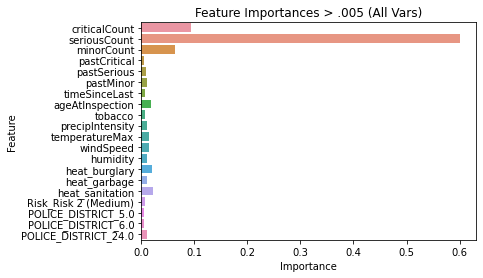

In [39]:
# feature importance 
feat_importances = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(rf_tune[1]))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

sns.barplot(x = "Importance", y = "Feature", data= feat_importances.loc[feat_importances['Importance'] > .005])
plt.title('Feature Importances > .005 (All Vars)');
plt.show()

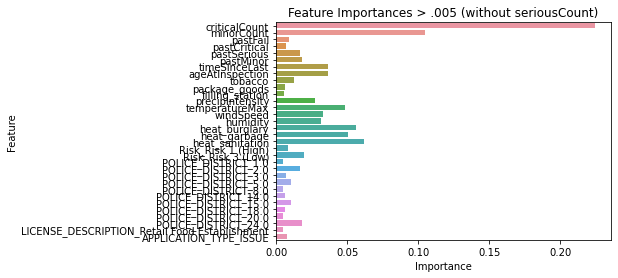

In [40]:
# Just out of curiosity: Feature importance for a model without serious count
feat_importances_reduced = pd.concat([pd.DataFrame(X_train.drop(['seriousCount'], axis = 1,inplace=False).columns)
                              ,pd.DataFrame(np.transpose(rf_reduced_tune[1]))], axis = 1)
feat_importances_reduced.columns = ["Feature", "Importance"]

sns.barplot(x = "Importance", y = "Feature", data= feat_importances_reduced.loc[feat_importances_reduced['Importance'] > .005])
plt.title('Feature Importances > .005 (without seriousCount)');
plt.show()

Having identified the above features with importances greater than .005, we now train a decision tree classifier on these reduced set of columns. 

In [41]:
# subset columns to features with importances > .005
important_features = feat_importances.loc[feat_importances['Importance'] > .005]['Feature']

X_reduced = X_train[X_train.columns[X_train.columns.isin(important_features)]] # create new df 
X_reduced_under = X_train_under[X_train_under.columns[X_train_under.columns.isin(important_features)]]
X_reduced_over = X_train_over[X_train_over.columns[X_train_over.columns.isin(important_features)]]
X_validate_reduced = X_validate[X_validate.columns[X_validate.columns.isin(important_features)]] 

X_reduced.head() # looks good 
X_reduced_under.head() # undersample looks good
X_reduced_over.head() # oversample looks good 

,criticalCount,seriousCount,minorCount,pastCritical,pastSerious,pastMinor,timeSinceLast,ageAtInspection,tobacco,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,Risk_Risk 2 (Medium),POLICE_DISTRICT_5.0,POLICE_DISTRICT_6.0,POLICE_DISTRICT_24.0
0,1.447917,-0.526077,-0.364947,-0.205945,-0.287986,-0.652463,0.712016,1.042528,3.186141,0.375656,-1.334401,0.296403,1.551405,0.833162,-0.826481,-0.543447,-0.512807,-0.119059,-0.1224,-0.203874
1,-0.351081,0.944039,0.627981,-0.205945,-0.287986,-0.652463,0.712016,0.738065,-0.313859,-0.600603,1.148555,-0.923363,0.206305,-0.533598,-0.352509,-0.922975,1.950051,-0.119059,-0.1224,-0.203874
2,-0.351081,-0.526077,0.131517,-0.205945,-0.287986,-0.652463,0.712016,0.335340,-0.313859,2.569691,-0.201319,0.347511,1.275487,-0.760447,-1.106656,-0.124182,-0.512807,-0.119059,-0.1224,-0.203874
3,-0.351081,-0.526077,-0.861411,-0.205945,-0.287986,-0.652463,0.712016,1.172055,-0.313859,-0.621775,1.243779,-1.492360,-0.380020,-0.537267,0.642139,-0.104779,1.950051,-0.119059,-0.1224,-0.203874
4,-0.351081,0.944039,0.131517,-0.205945,-0.287986,-0.652463,0.712016,-1.029161,-0.313859,0.212554,0.210060,1.878465,0.309775,1.062012,-0.086073,-0.142189,1.950051,-0.119059,-0.1224,-0.203874


Below, we define a function to tune a decision tree model on the reduced set of variables. 

In [42]:
# Create the decision tree classifier grid
param_grid = {'criterion': ['gini', 'entropy'], 
              'splitter': ['best', 'random'], 
              'max_depth': np.arange(2,10,2),
               'min_samples_split': np.arange(1,9,2),
               'min_samples_leaf': np.arange(1,9,2),
              'max_features': ['auto', 'sqrt', 'log2']}

dt_classifier = tree.DecisionTreeClassifier() # define decision tree classifier 

def dt_tune(X_train, X_validate, y_train, y_validate):
    dt_grid = GridSearchCV(dt_classifier,param_grid, cv = 5, n_jobs= -1, verbose = 2) # perform grid search with 5 fold CV 
    dt_model = dt_grid.fit(X_train, y_train) # fit on grid search 
    best_index = np.argmax(dt_grid.cv_results_["mean_test_score"]) 
    
    print("The optimal hyperparameters are: ", dt_grid.cv_results_["params"][best_index])
    
    fig = plt.figure(figsize=(45,45))
    _ = tree.plot_tree(dt_grid.best_estimator_,
                       feature_names=X_reduced_over.columns,
                       class_names=["Pass", "Fail"],
                       filled=True,
                       fontsize = 10, 
                       max_depth = 5)
                       
    # Use best model to predict on training and validation sets
    dt_pred_training = dt_model.best_estimator_.predict(X_train)
    dt_pred_validation = dt_model.best_estimator_.predict(X_validate)
    
    # compare RMSE
    print("Decision Tree Classifier RMSE Training: ",rmse(dt_pred_training, y_train))
    print("Decision Tree Classifier RMSE Validation: ",rmse(dt_pred_validation, y_validate))
    print('Training R^2:', dt_model.best_estimator_.score(X_train, y_train))
    print('Validation R^2:', dt_model.best_estimator_.score(X_validate, y_validate))
    results=[dt_pred_validation,dt_model.best_estimator_]
    
    #compare confusion matrix
    cf_matrix = confusion_matrix(y_validate, dt_pred_validation, normalize = "true")
    df_cm = pd.DataFrame(cf_matrix, range(2),range(2))
    print("confusion Matrix:", df_cm)

    return(results)

Now, we run the function on the regular, over, and under samples. 

All data:
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:    9.7s finished


The optimal hyperparameters are:  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 1, 'splitter': 'best'}
Decision Tree Classifier RMSE Training:  0.5931378817344108
Decision Tree Classifier RMSE Validation:  0.5899695246225353
Training R^2: 0.9214021336816896
Validation R^2: 0.9115102040816326
confusion Matrix:           0         1
0  0.917178  0.082822
1  0.110931  0.889069


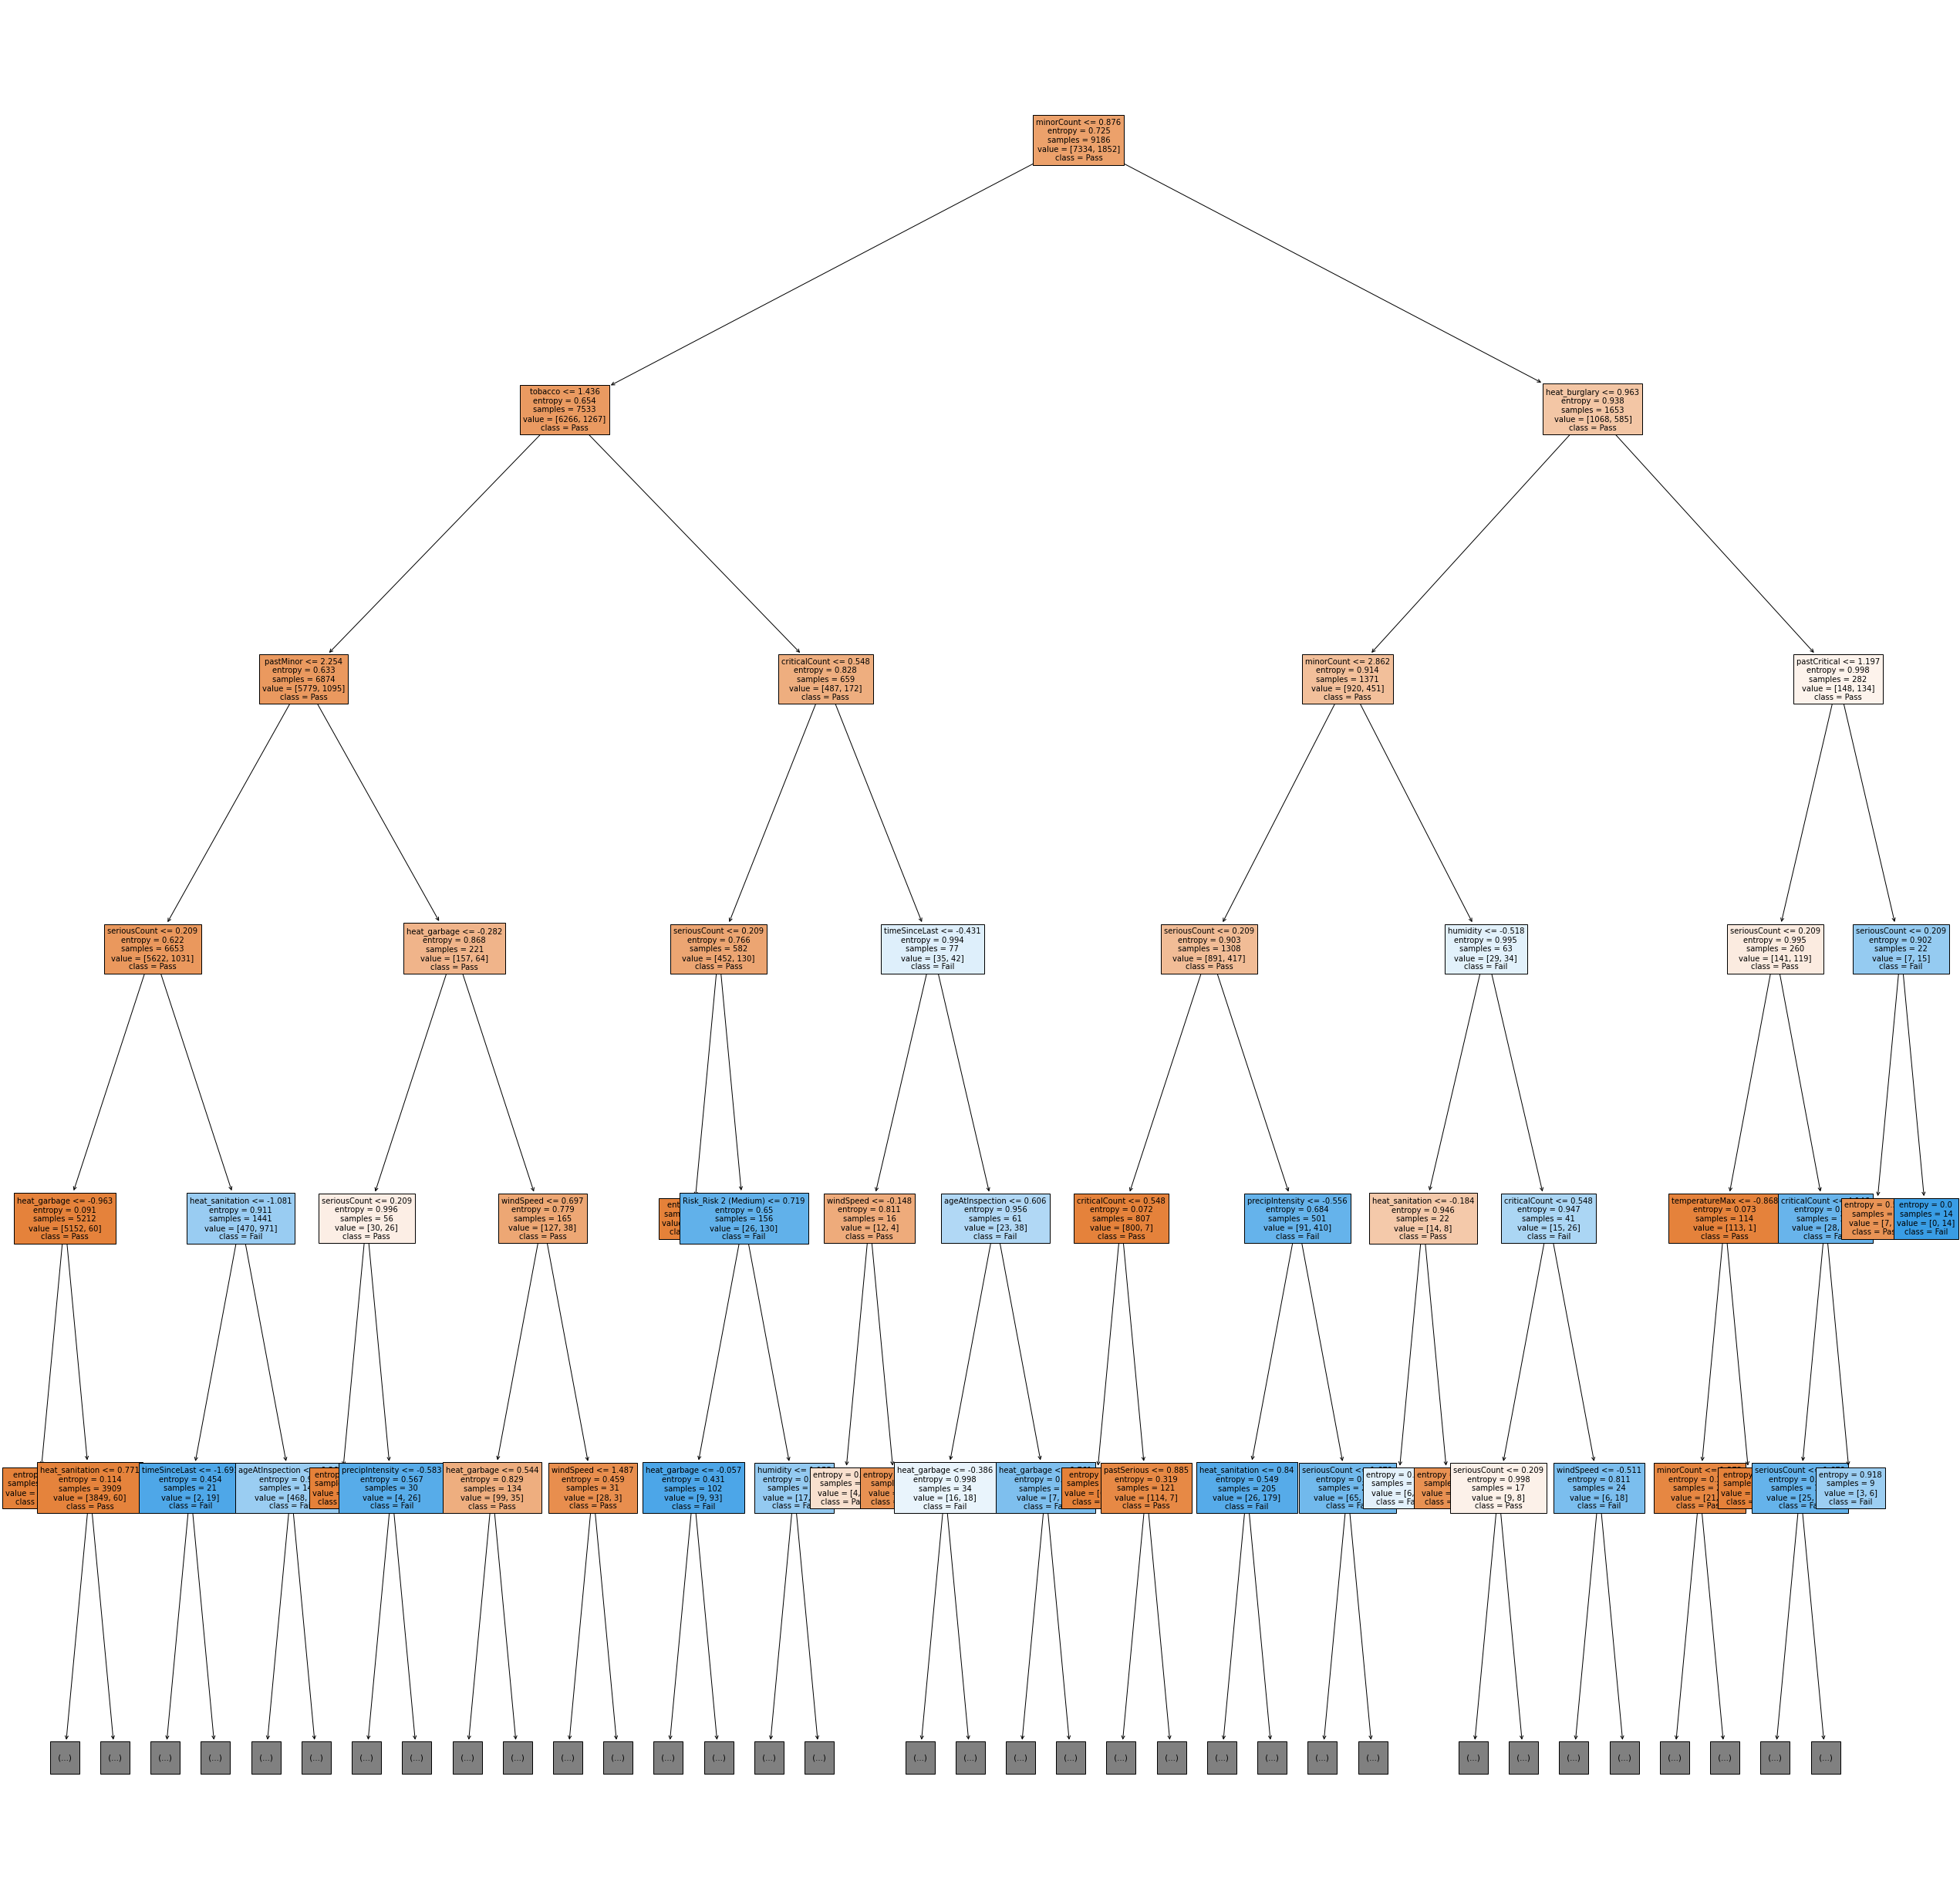

In [43]:
print("All data:")
dt_best_pred_alldata = dt_tune(X_reduced, X_validate_reduced, y_train, y_validate);

Oversampling:
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 1492 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 2624 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:   22.5s finished


The optimal hyperparameters are:  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 1, 'splitter': 'best'}
Decision Tree Classifier RMSE Training:  0.27550352213707807
Decision Tree Classifier RMSE Validation:  0.605615262272627
Training R^2: 0.9240978092900646
Validation R^2: 0.8935510204081633
confusion Matrix:           0         1
0  0.886299  0.113701
1  0.077733  0.922267


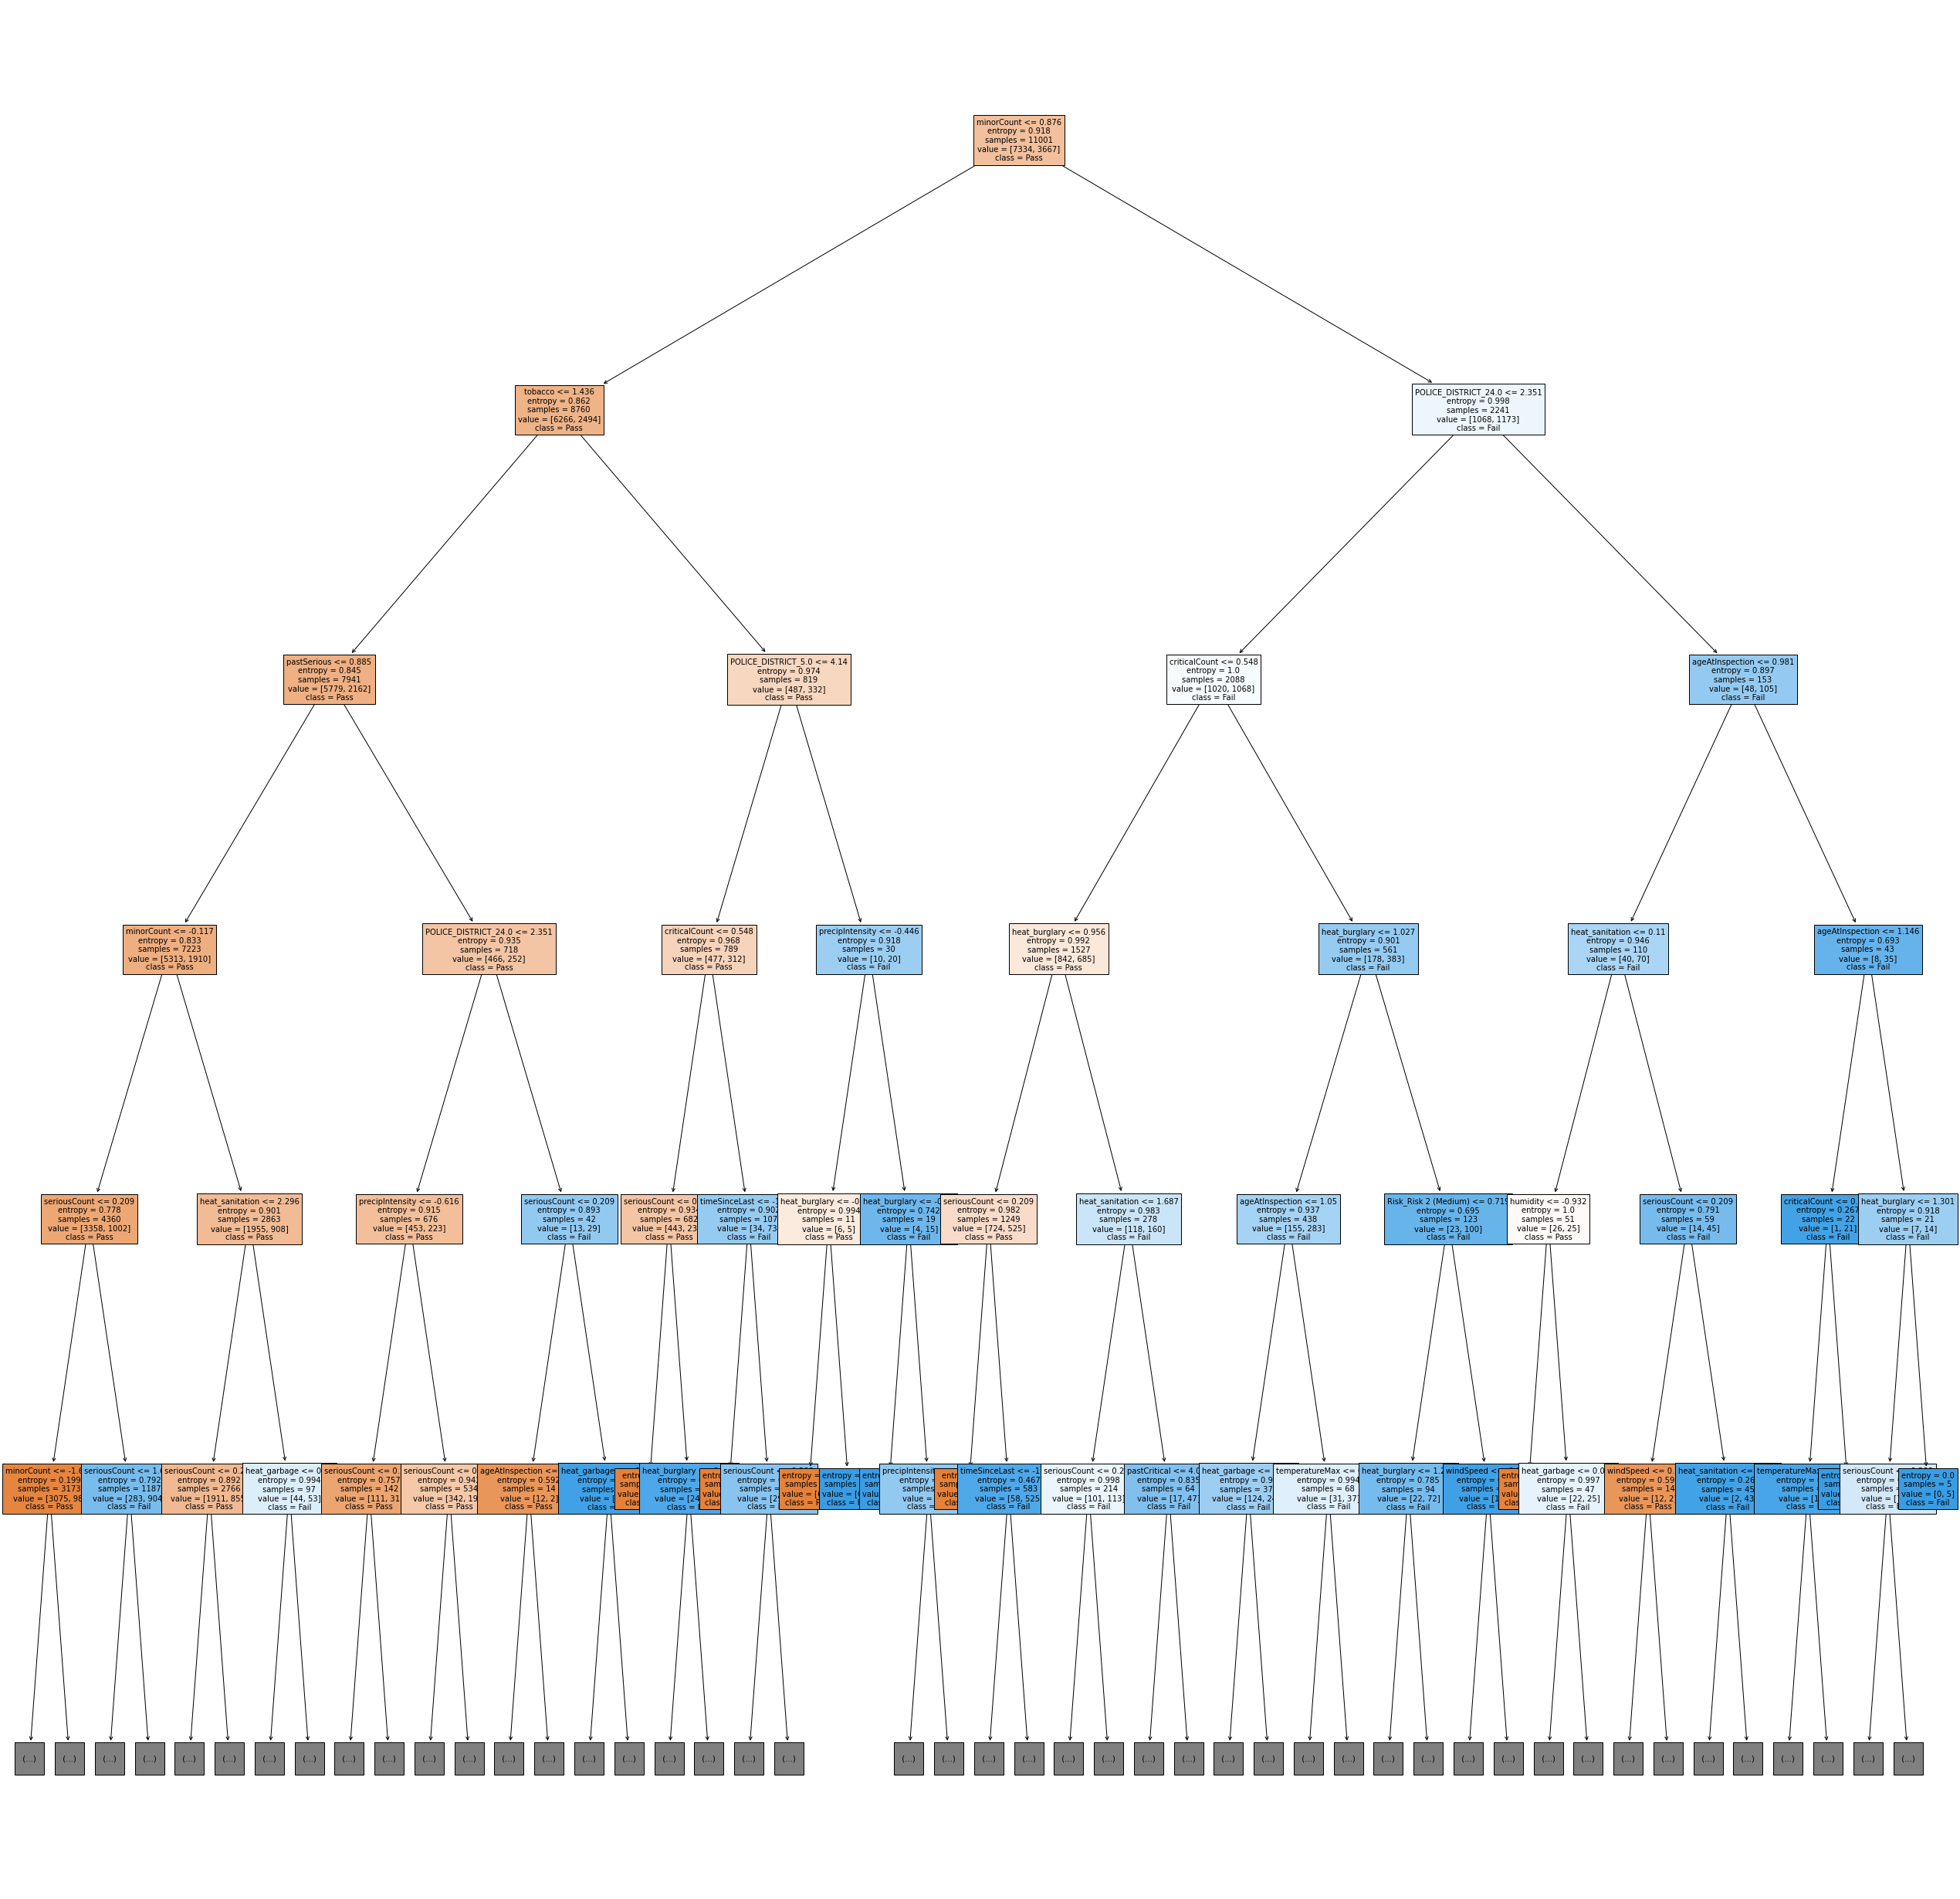

In [44]:
print("Oversampling:")
dt_best_pred_over = dt_tune(X_reduced_over, X_validate_reduced, y_train_over, y_validate);

Undersampling:
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:    8.1s finished


The optimal hyperparameters are:  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 1, 'splitter': 'best'}
Decision Tree Classifier RMSE Training:  0.34151232707830076
Decision Tree Classifier RMSE Validation:  0.6334498208633841
Training R^2: 0.8833693304535637
Validation R^2: 0.846204081632653
confusion Matrix:           0         1
0  0.820450  0.179550
1  0.051822  0.948178


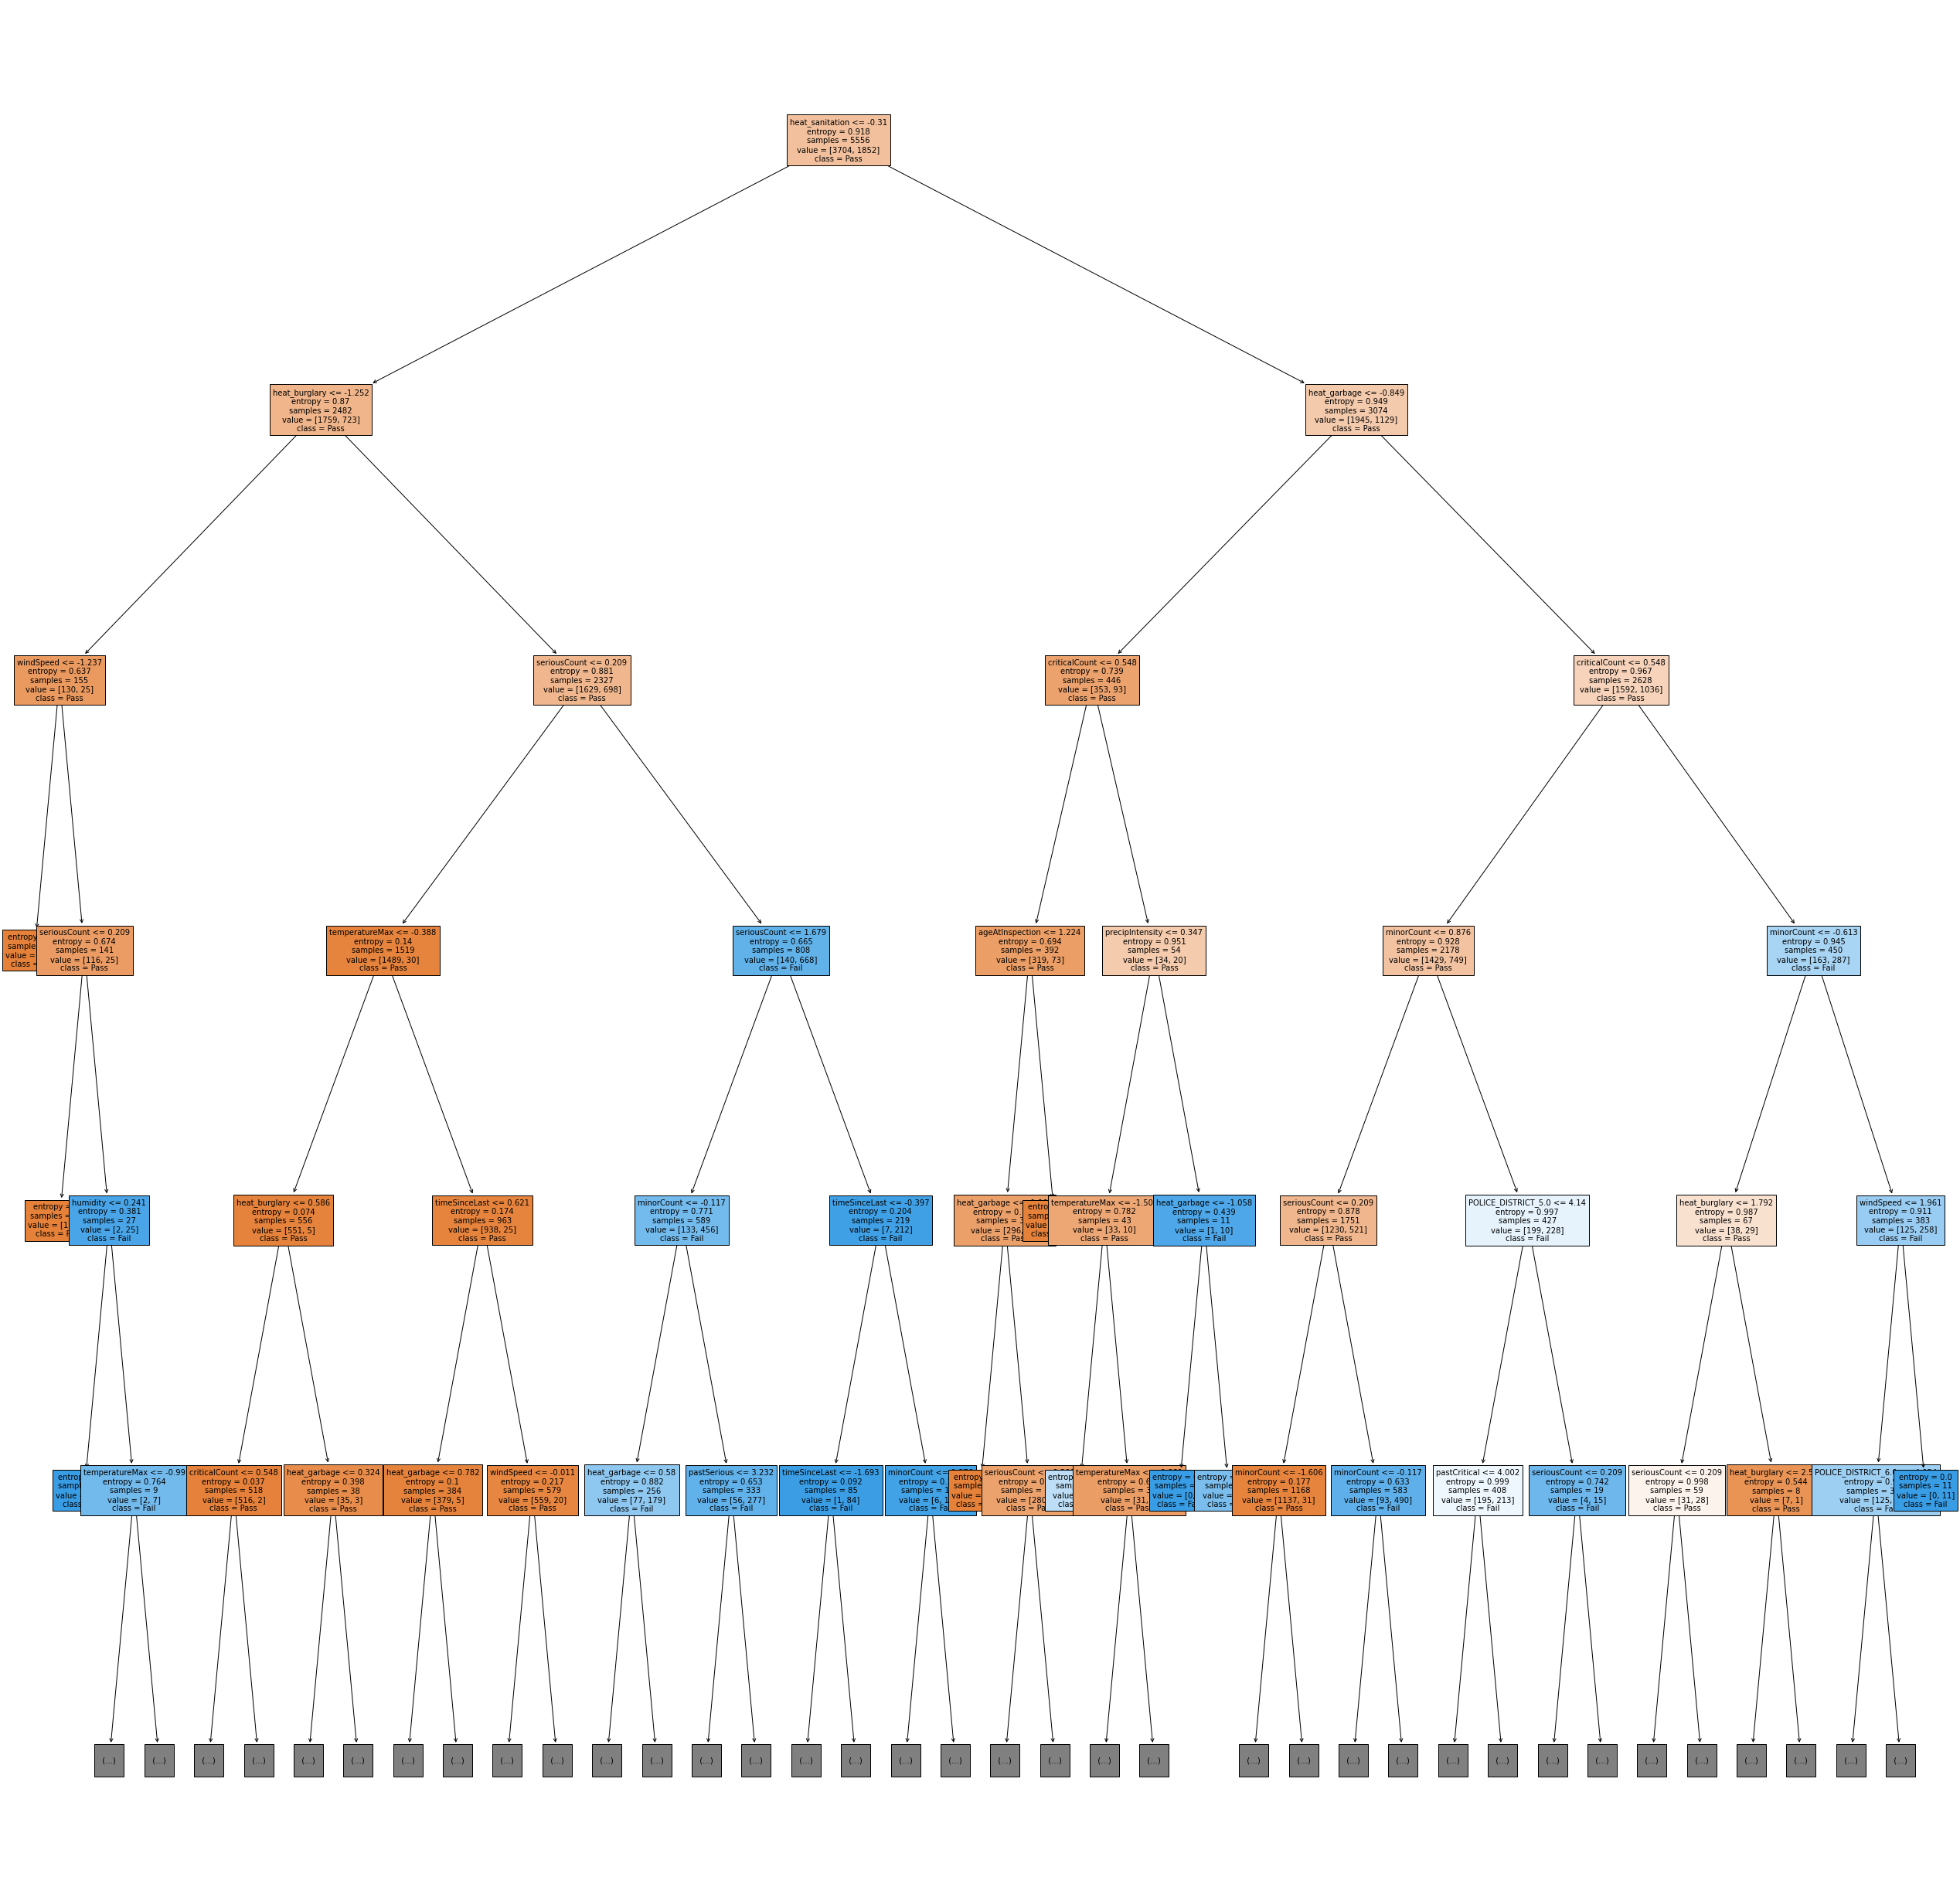

In [45]:
print("Undersampling:")
dt_best_pred_under = dt_tune(X_reduced_under, X_validate_reduced, y_train_under, y_validate);

Based on the decision trees and results, each model has its advantages and disadvantages. We will discuss this in the context of accuracy, precision, recall, and F1 score below. 

### Validation Metrics

Below is a for loop that uses cross_val_score to check for accuracy, precision, recall and f1 across all of our models.

In [46]:
#initializing lists:
Accuracy = []
Precision = []
Recall = []
F1 = []
Sensitivity_TPR =[]
False_Positive_Rate=[]

#defining function to evaluate models
def evaluate_model(y_pred,y_validatation):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_pred)): 
        if y_validatation[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_validatation[i]!=y_pred[i]:
           FP += 1
        if y_validatation[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_pred[i]!=y_validatation[i]:
           FN += 1
        
    Accuracy_m  = (TP + TN)/(TP + TN + FP + FN)
    Precision_m = TP/(TP + FP)
    Recall_m    = TP/(TP + FN)
    F1_m        = 2 * (Precision_m * Recall_m)/(Precision_m + Recall_m)
    Sensitivity_TPR_m     = TP/(TP+FN)
    False_Positive_Rate_m = 1-(FP/(TN+FP))
    
    Accuracy.append(Accuracy_m)
    Precision.append(Precision_m)
    Recall.append(Recall_m)
    F1.append(F1_m)
    Sensitivity_TPR.append(Sensitivity_TPR_m)
    False_Positive_Rate.append(False_Positive_Rate_m)
    
# Generate models to evaluate
log_cross_val_alldata_pred = cross_val_predict(logit_best_pred_alldata[2], X, y, cv = 5)
log_cross_val_over_pred = cross_val_predict(logit_best_pred_over[2], X, y, cv = 5)
log_cross_val_under_pred = cross_val_predict(logit_best_pred_under[2], X, y, cv = 5)

svm_cross_val_under_pred = cross_val_predict(svm_model2, X, y, cv =5)

tree_cross_val_alldata_pred = cross_val_predict(dt_best_pred_alldata[1], X, y, cv =5)
tree_cross_val_over_pred = cross_val_predict(dt_best_pred_over[1], X, y, cv =5)
tree_cross_val_under_pred = cross_val_predict(dt_best_pred_under[1], X, y, cv =5)

Model_name = [
              'Logistic Regression - All data'
              , 'Logistic Regression - Oversampling'
              ,'Logistic Regression - Undersampling'
              , 'SVM - Undersampling'
              , 'Decision Tree - All data'
              , 'Decision Tree - Oversampling'
              ,'Decision Tree - Undersampling'
            ]
Model_pred = [
               log_cross_val_alldata_pred
              ,log_cross_val_over_pred
              ,log_cross_val_under_pred
              ,svm_cross_val_under_pred
              ,tree_cross_val_alldata_pred
              ,tree_cross_val_over_pred
              ,tree_cross_val_under_pred]

# Loop through model and evaluate
for pred in (Model_pred):
    evaluate_model(pred,y)

# Gather results in dataframe
data_tuples = list(zip(Accuracy,Precision,Recall,F1,Sensitivity_TPR,False_Positive_Rate))
models_df = pd.DataFrame(data_tuples, columns=['Accuracy','Precision','Recall','F1','Sensitivity_TPR','FPR'])
models_df.index= Model_name

We show the results of our models below. Note that we intentionally left out two SVM models from this table because of run time. From above, it was clear that undersampling was significantly better at predicting failure than oversampling, even though oversampling was marginally better at predicting passing. 

In [47]:
models_df

,Accuracy,Precision,Recall,F1,Sensitivity_TPR,FPR
Logistic Regression - All data,0.920580,0.781015,0.842242,0.810474,0.842242,0.940363
Logistic Regression - Oversampling,0.923127,0.743996,0.943311,0.831881,0.943311,0.918030
Logistic Regression - Undersampling,0.920580,0.781015,0.842242,0.810474,0.842242,0.940363
SVM - Undersampling,0.913983,0.757717,0.842890,0.798037,0.842890,0.931937
Decision Tree - All data,0.854222,0.717336,0.457078,0.558370,0.457078,0.954516
Decision Tree - Oversampling,0.869440,0.730313,0.558795,0.633144,0.558795,0.947889
Decision Tree - Undersampling,0.834759,0.752036,0.269193,0.396469,0.269193,0.977585


Overall, the logistic regression method outperforms the support vector machine and decision tree methods across the boards. While all logit models have an approximate accuracy of 92 percent, they are differentiated by precision and recall (and, by extension, F1 scores). Although the oversample has a slightly lower precision than the all samples set, this is outweighed by its much higher recall and reflected in the higher F1 score. In other words, the all data is better at predicting true positives only but only because it is overpredicting positives. 

From a policy standpoint, we must consider the pros and cons of both predicting that a business will fail when it will not (i.e., false positives) and predicting that a business will not fail when it in fact will (i.e., false negatives). In this context, we believe that the relevant considerations are a) public health concerns for neglecting to audit an unsafe business and b) the cost of performing audits when the businesses are in fact following guidelines. While we don't know these exactly, we argue that especially given the accuracy of the three logit models is roughly similar, prioritizing recall makes the most sense because false negatives are more costly in that they pose a threat people's health and safety. If fines are attached to violations, correctly auditing an unsafe business could increase revenues for Chicago. Slightly over-auditing may also yield positive externalities in that other businesses may be more vigilant about upholding safety standards out of fear of being audited. 

## 4. Policy Simulation

### 4.1. Interpretable Machine Learning

Below, we include more details and visuals for each of the three methods used. 

 #### *a) Visualization: Logistic Regression*

**Logistic Regression Coefficients:**

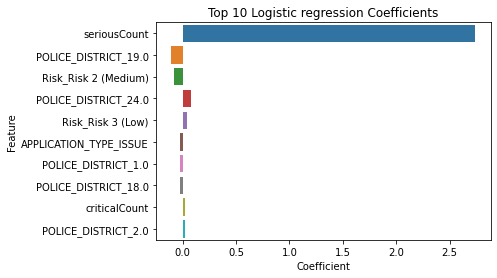

In [48]:
log_reg_data = pd.DataFrame([logit_best_pred_over[1], X_train_over.columns]).T
log_reg_data.columns= ['Coefficient', 'Feature']
log_reg_data['AbsCoef'] = pd.to_numeric(log_reg_data['Coefficient'].abs())
top = log_reg_data.nlargest(10,['AbsCoef'])

# Plot
ax = sns.barplot(x="Coefficient", y="Feature", data=top)
ax.set_title("Top 10 Logistic regression Coefficients")
plt.show()

**Logistic Regression Confusion Matrix:**

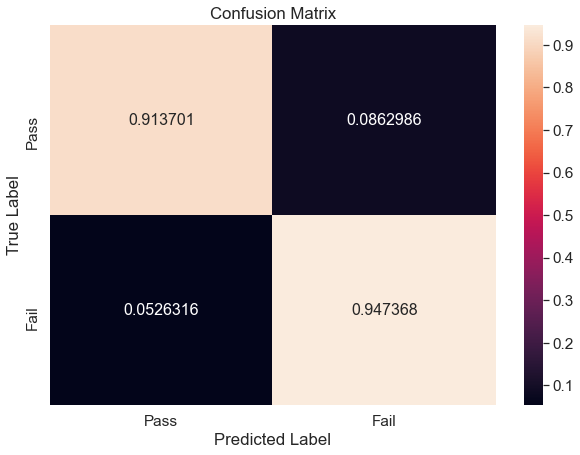

In [49]:
cf_matrix = confusion_matrix(y_validate, logit_best_pred_over[0], normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### *b) Visualization: SVM*

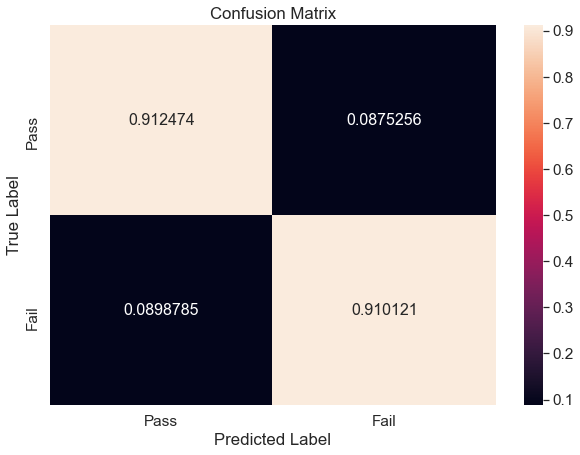

In [50]:
cf_matrix = confusion_matrix(y_validate, svm_y_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### c) *Visualization: Decision Tree Classifier*

Because we generated feature importance plots, decision trees, and confusion matrices above for all samples, oversamples, and undersamples, we won't recreate them here to avoid redundancy (see Section 3).  

### 4.2. Prioritize Audits

**1. We use our best model - logistic regression to predict the outcomes and the probabilities of the validation set**

In [60]:
Best_model_pred = logit_best_pred_over[2].predict(X_train_over)
Best_model_prob = logit_best_pred_over[2].predict_proba(X_train_over)

d= {"Probabilities":list(Best_model_prob),"Prediction":list(Best_model_pred)}
df = pd.DataFrame(d)
df['prob_pass']='Nan'
df['prob_fail']='Nan'

for i in range(0,len(df)):
    df['prob_pass'][i]=df['Probabilities'][i][0]
    df['prob_fail'][i]=df['Probabilities'][i][1] 
    
df.head(3)

,Probabilities,Prediction,prob_pass,prob_fail
0,"[0.9504943210134197, 0.04950567898658033]",0,0.950494,0.0495057
1,"[0.28822121717258886, 0.7117787828274111]",1,0.288221,0.711779
2,"[0.9523991519707212, 0.047600848029278726]",0,0.952399,0.0476008


**2. We Order our audits by their probability of detecting a "Fail" score**

In [61]:
df.sort_values(by='prob_fail', axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')
df['prob_fail'] = df['prob_fail'].astype("float64")
df['prob_pass'] = df['prob_pass'].astype("float64")

**3. We Plot the distributions of pass/fail among the first 1000 observations in the dataset**

In [62]:
df_1000 = df.nlargest(1000,['prob_fail']) 

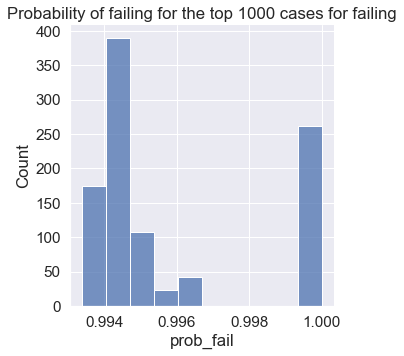

In [121]:
sns.displot(df_1000, x="prob_fail", bins=10)

plt.title("Probability of failing for the top 1000 cases for failing")
plt.show()

# sns.displot(df_1000, x="prob_pass", bins=10)
# plt.title("Probability of Passing for the top 1000 cases for failing")
# plt.show()

**4. We Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random**

In [115]:
sample_1000 =X.sample(1000)
sample_1000 = sample_1000[ sample_1000.columns &  list(X_train_over_SF.columns)]
sample_1000_pred = logit_best_pred_over_SF[2].predict(sample_1000)
sample_1000_prob = logit_best_pred_over_SF[2].predict_proba(sample_1000)

S= {"Probabilities":list(sample_1000_prob),"Prediction":list(sample_1000_pred)}
df_random = pd.DataFrame(S)
df_random['prob_pass']='Nan'
df_random['prob_fail']='Nan'

for i in range(0,len(df_random)):
    df_random['prob_pass'][i]=df_random['Probabilities'][i][0]
    df_random['prob_fail'][i]=df_random['Probabilities'][i][1] 
    
df_random.head(3)

,Probabilities,Prediction,prob_pass,prob_fail
0,"[0.0008241575265471868, 0.9991758424734528]",1,0.000824158,0.999176
1,"[0.914096079639266, 0.08590392036073403]",0,0.914096,0.0859039
2,"[0.9150254652081077, 0.08497453479189235]",0,0.915025,0.0849745


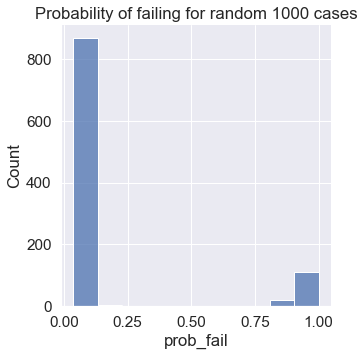

In [122]:
sns.displot(df_random, x="prob_fail", bins=10)
plt.title("Probability of failing for random 1000 cases")
plt.show()

# sns.displot(df_random, x="prob_pass", bins=10)
# plt.title("Probability of Passing for random 1000 cases")
# plt.show()

### 4.3. Predict on Data with Unseen Labels

In [123]:
#Preprocessing
X_test = chicago_inspections_2014[ chicago_inspections_2014.columns &  list(chicago_inspections_2011_to_2013.columns)]
X_test['POLICE_DISTRICT'] = X_test['POLICE_DISTRICT'].astype(object)
X_test = pd.get_dummies(X_test)
X_test = X_test.dropna()
#Keeping selected features for the regression model
X_test = X_test[ X_test.columns &  list(X_train_over_SF.columns)] 
#Scaling data
X_test = pd.DataFrame(preprocessing.scale(X_test), columns = X_test.columns)

X_test.head(3)

,criticalCount,seriousCount,minorCount,pastFail,pastCritical,Risk_Risk 2 (Medium),Risk_Risk 3 (Low),POLICE_DISTRICT_1.0,POLICE_DISTRICT_2.0,POLICE_DISTRICT_18.0,POLICE_DISTRICT_19.0,POLICE_DISTRICT_24.0,LICENSE_DESCRIPTION_Package Goods,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
0,3.000312,-0.545031,-1.815073,-0.40796,-0.330155,-0.514872,-0.145865,-0.339224,-0.153479,-0.355862,-0.365725,-0.216607,-0.031144,2.182971,-2.143244
1,-0.389667,-0.545031,1.168450,-0.40796,-0.330155,1.942229,-0.145865,-0.339224,-0.153479,-0.355862,-0.365725,-0.216607,-0.031144,-0.458091,0.466582
2,-0.389667,0.982388,1.665704,-0.40796,-0.330155,-0.514872,6.855655,-0.339224,-0.153479,-0.355862,-0.365725,-0.216607,-0.031144,-0.458091,0.466582


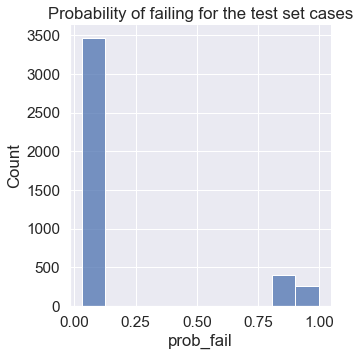

In [124]:
#Predict on test data
test_pred = logit_best_pred_over_SF[2].predict(X_test)

#plot distribution of probabilities
test_prob = logit_best_pred_over_SF[2].predict_proba(X_test)

t= {"Probabilities":list(test_prob),"Prediction":list(test_pred)}
test = pd.DataFrame(t)
test['prob_pass']='Nan'
test['prob_fail']='Nan'

for i in range(0,len(test)):
    test['prob_pass'][i]=test['Probabilities'][i][0]
    test['prob_fail'][i]=test['Probabilities'][i][1] 
    
test.head(3)

sns.displot(test, x="prob_fail", bins=10)
plt.title("Probability of failing for the test set cases")
plt.show()

## 5. Discussion

**5.1 Why do we need metrics beyond accuracy when us- ing machine learning in the social sciences and public policy?**  
  


Accuracy can be a good metric for determining performance of a machine learning algorithm when data are balanced, but oftentimes data are not balanced. For example, in the case of infectious diseases, a policymaker might want to identify individuals at high risk of being sick to direct resources accordingly. If, say, only 0.01 percent of the population is sick and you predict that 100 percent of the population is not, the accuracy would be misleadingly high at 99.99 percent. As in the case of predicting health inspection failure, recall would be a good choice if we want to penalize false negatives. On the other end of the spectrum, precision might be a better metric if the cost of false positives is high. One possible example would be if audits are expensive to conduct, and the algorithm is classifying too many businesses as failing to the point that it outweighs the benefits of correctly catching the violations in the first place. 

Taken together, these examples highlight the importance of conceptualizing the cost of false negatives, false positives, and sample balance when evaluating the utility of models in a policy setting. As such, social scientists and policymakers must use other metrics to evaluate our models to ensure that the algorithm chosen is indeed the best fit not only for the data (without overfitting, of course), but also for the context. 


**5.2 Imagine that establishments learned about the algo- rithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were im- portant for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?**

To address the behavior change of establishments, it would be important for policymakers to ensure that data on establishments are kept up-to-date with a number of multiple variables/features collected and that algorithms are continuously evaluated based on the new data and adjusted as accuracy and other metrics declined. For example, one possibility might be that policymakers randomly assign businesses to audit, effectively creating their own test set upon which to evaluate extant models. In other words, it is important to combine algorithm predictions with the judgment of humans—by using model predictions to determine who auditors should prioritize during their field surveys but also recognizing that algorithms can be gamed. This is all of course assuming the changes to their behavior are in fact performative and do not result in meaningful improvements in safety.